# Initial Data

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import pandas as pd

df0 = pd.read_csv("data_with_features.csv")
df0.head()


index                  name         k2        K1        rAC       rcat  \
0      0  coords_1Kps_001_0001   4154.248  0.358224   1127.679   1127.664   
1      1  coords_1Kps_002_0002   7842.454  0.174889   1207.018   1207.000   
2      2  coords_1Kps_002_0103   9576.523  1.026440   4944.847   4944.548   
3      3  coords_1Kps_003_0003  59065.000  0.553494  21580.010  21574.300   
4      4  coords_1Kps_003_0102   2904.114  0.938815   1434.774   1434.749   

    kg(473K)       kg(673K)      kg(873K)  pg(473K)  ...  pg(873K)  \
0  17.990870   63998.070000  5.905110e+06  1.000000  ...       1.0   
1  60.892890  162649.600000  1.291530e+07  1.000000  ...       1.0   
2   0.000005       1.538175  1.559147e+03  0.018377  ...       1.0   
3  22.120010   82010.950000  7.720031e+06  1.000000  ...       1.0   
4  50.705310  138567.900000  1.108968e+07  1.000000  ...       1.0   

   reff(Tg=473K)  reff(Tg=673K)  reff(Tg=873K)        r1        r2  \
0     1127.66400       1127.664       1127.664  5.386470  0.146928   
1     1207.00000       1207.000       1207.000  5.480156  0.025942   
2       90.86669       4944.548       4944.548  5.411764  0.122305   
3    21574.30000      21574.300      21574.300  5.382705 -0.132749   
4     1434.74900       1434.749       1434.749  5.110214 -0.099353   

   shaft_length      theta1    theta2    torsion  
0      4.421667  167.201469  6.565717  14.747488  
1      4.482822  185.517513  6.196532  11.304056  
2      3.959733  166.709309 -6.711944   1.613101  
3      4.302871  146.813691  0.724178  27.109136  
4      4.520485  164.223536 -0.614341   3.085213  

[5 rows x 21 columns]

In [25]:
features = ["r1", "r2", "shaft_length", "theta1", "theta2", "torsion"]
df = df0[features]
df.head()

r1        r2  shaft_length      theta1    theta2    torsion
0  5.386470  0.146928      4.421667  167.201469  6.565717  14.747488
1  5.480156  0.025942      4.482822  185.517513  6.196532  11.304056
2  5.411764  0.122305      3.959733  166.709309 -6.711944   1.613101
3  5.382705 -0.132749      4.302871  146.813691  0.724178  27.109136
4  5.110214 -0.099353      4.520485  164.223536 -0.614341   3.085213

# Target 1: rcat

In [63]:
from sklearn.manifold import TSNE

t_sne = TSNE(
    n_components=2,
    learning_rate="auto",
    perplexity=10,
    max_iter=250,
    init="random",
    random_state = 0
)
t_sne250 = t_sne.fit_transform(df)

In [27]:
rcat_color=df0["rcat"]

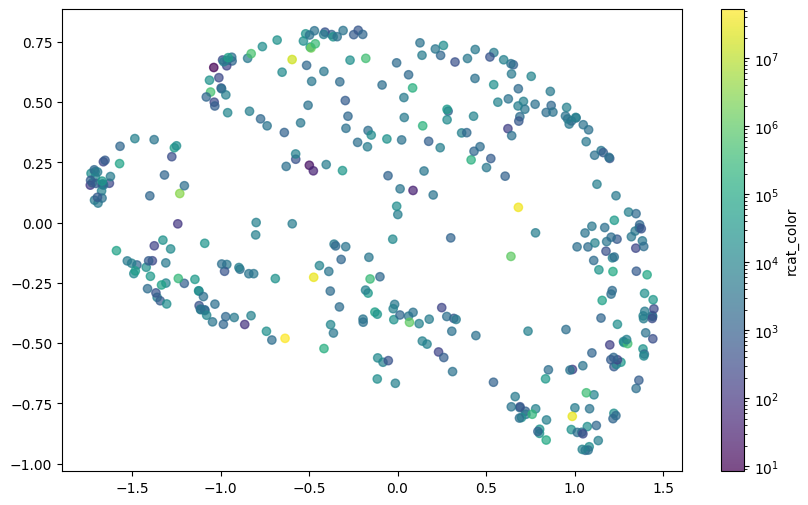

In [64]:
import matplotlib
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(t_sne250[:,1], t_sne250[:,0], c=rcat_color, alpha = 0.7, norm=matplotlib.colors.LogNorm())
fig.colorbar(scatter, ax=ax, label='rcat_color')
plt.show()

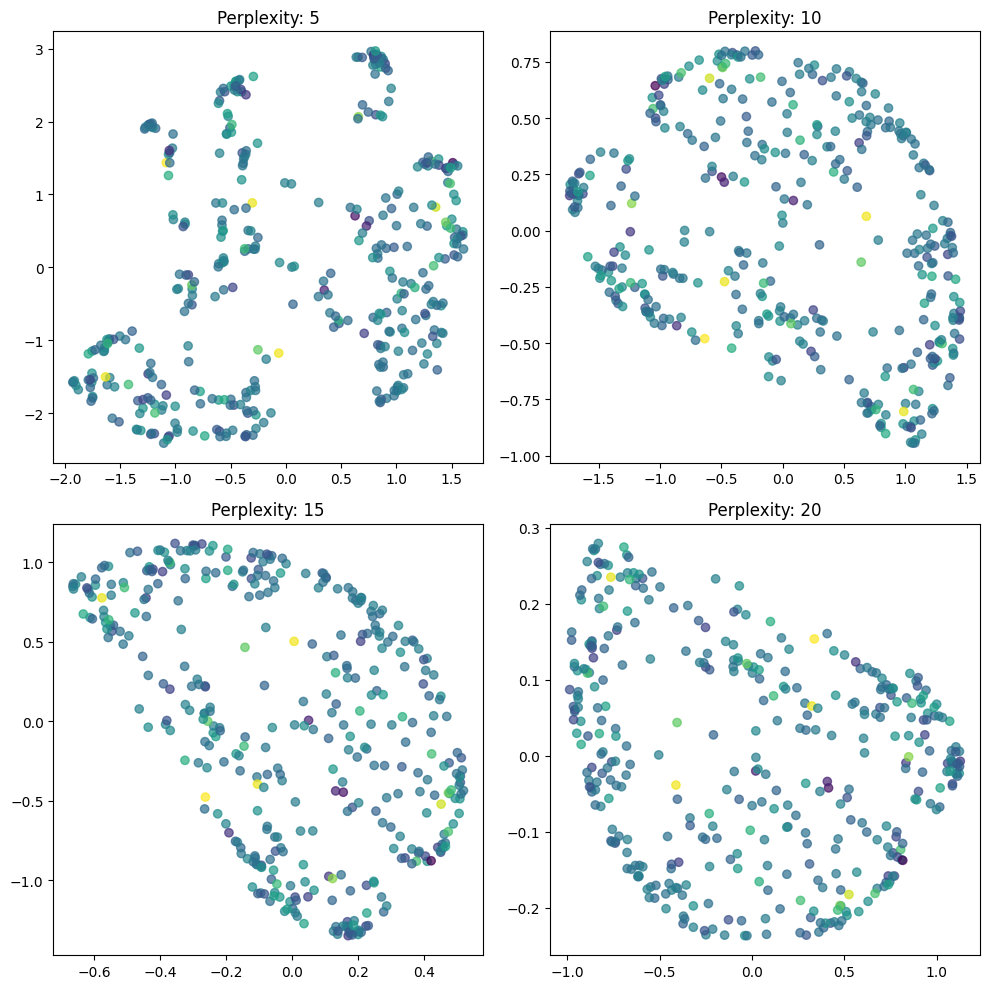

In [29]:
perplexities = [5, 10, 15, 20]

fig,axes = plt.subplots(2, 2, figsize=(10,10))

for i, perplexity in enumerate(perplexities):
  row = i // 2
  col = i % 2
  t_sne = TSNE(
      n_components=2,
      learning_rate="auto",
      perplexity=perplexity,
      max_iter=250,
      init="random",
      random_state=0
  )
  t_sne250 = t_sne.fit_transform(df)
  ax = axes[row, col]
  ax.scatter(t_sne250[:,1], t_sne250[:,0], c=rcat_color, alpha = 0.7, norm=matplotlib.colors.LogNorm())
  ax.set_title("Perplexity: " + str(perplexity))

plt.tight_layout()
plt.show()

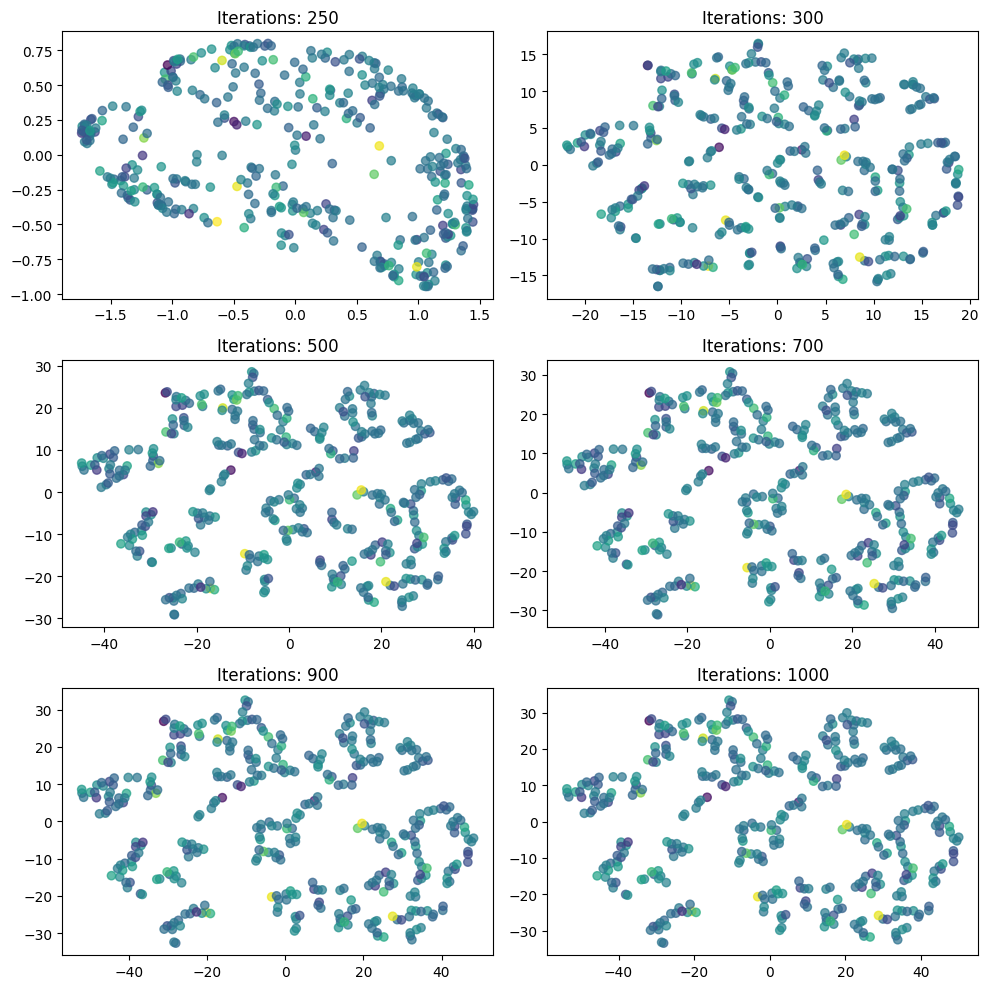

In [30]:
iterations = [250, 300, 500, 700, 900, 1000]

fig,axes = plt.subplots(3, 2, figsize=(10,10))

for i, iteration in enumerate(iterations):
  row = i // 2
  col = i % 2
  t_sne = TSNE(
      n_components=2,
      learning_rate="auto",
      perplexity=10,
      max_iter=iteration,
      init="random",
      random_state=0
  )
  t_sne250 = t_sne.fit_transform(df)
  ax = axes[row, col]
  ax.scatter(t_sne250[:,1], t_sne250[:,0], c=rcat_color, alpha = 0.7, norm=matplotlib.colors.LogNorm())
  ax.set_title("Iterations: " + str(iteration))

plt.tight_layout()
plt.show()

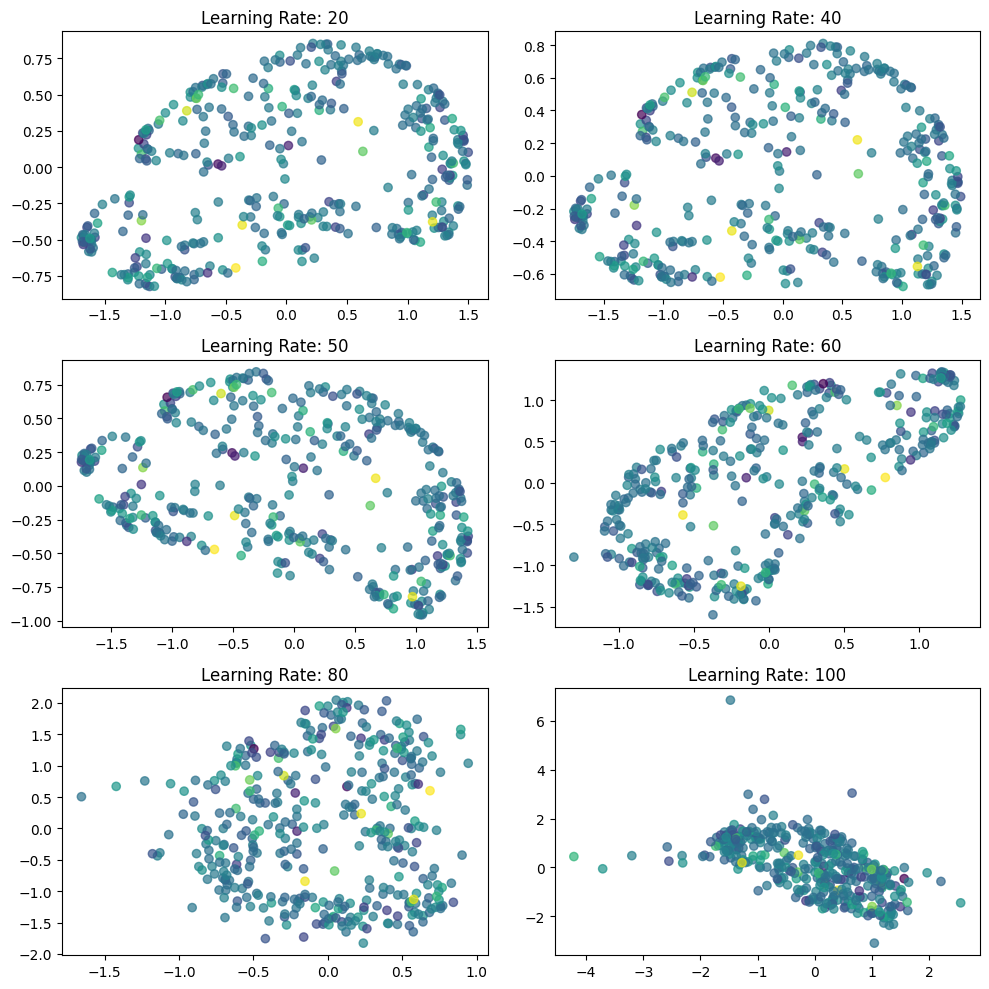

In [67]:
learnRates = [20, 40, 50, 60, 80, 100]

fig,axes = plt.subplots(3, 2, figsize=(10,10))

for i, rate in enumerate(learnRates):
  row = i // 2
  col = i % 2
  t_sne = TSNE(
      n_components=2,
      learning_rate=rate,
      perplexity=10,
      max_iter=250,
      init="random",
      random_state=0
  )
  t_sne250 = t_sne.fit_transform(df)
  ax = axes[row, col]
  ax.scatter(t_sne250[:,1], t_sne250[:,0], c=rcat_color, alpha = 0.7, norm=matplotlib.colors.LogNorm())
  ax.set_title("Learning Rate: " + str(rate))

plt.tight_layout()
plt.show()

Three targets: rAC, rcat, and reff(Tg=673K)


# Target 2: rAC

In [31]:
rcat_color2 = df0["rAC"]

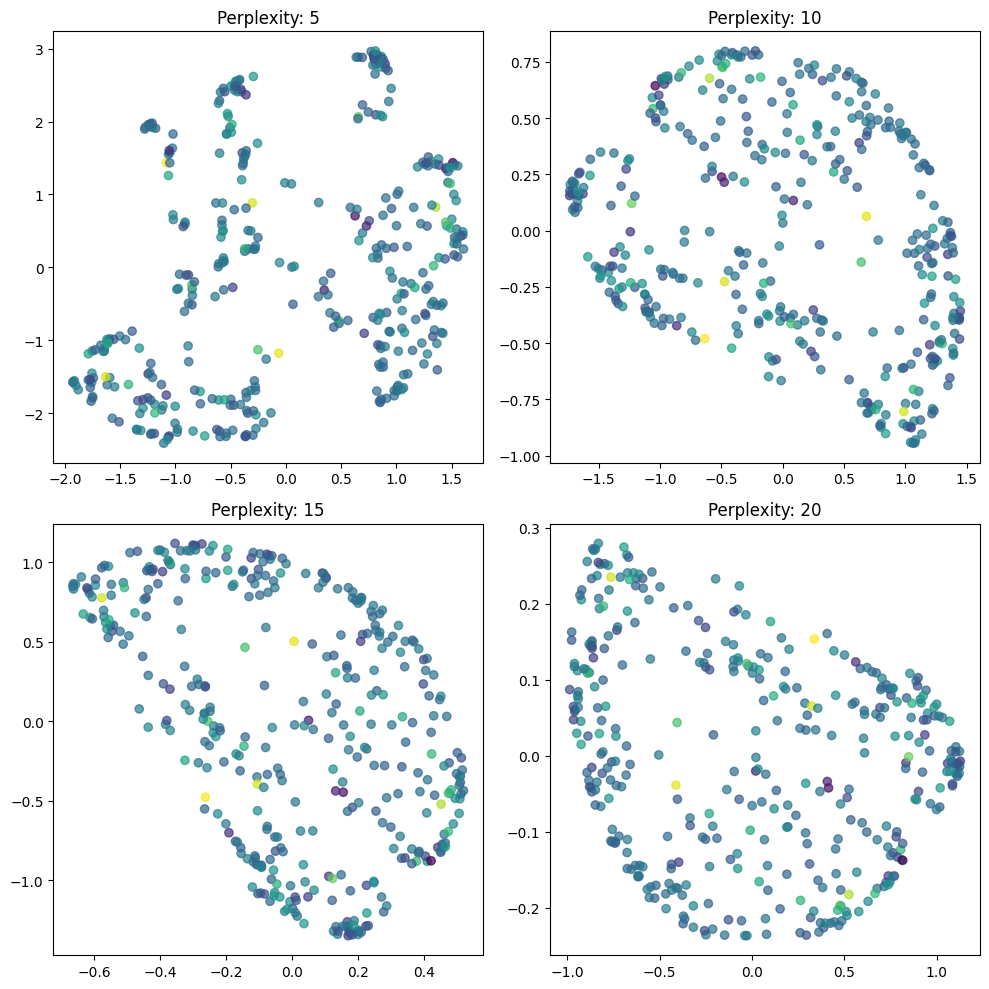

In [32]:
perplexities = [5, 10, 15, 20]

fig,axes = plt.subplots(2, 2, figsize=(10,10))

for i, perplexity in enumerate(perplexities):
  row = i // 2
  col = i % 2
  t_sne = TSNE(
      n_components=2,
      learning_rate="auto",
      perplexity=perplexity,
      max_iter=250,
      init="random",
      random_state=0
  )
  t_sne250 = t_sne.fit_transform(df)
  ax = axes[row, col]
  ax.scatter(t_sne250[:,1], t_sne250[:,0], c=rcat_color2, alpha = 0.7, norm=matplotlib.colors.LogNorm())
  ax.set_title("Perplexity: " + str(perplexity))

plt.tight_layout()
plt.show()

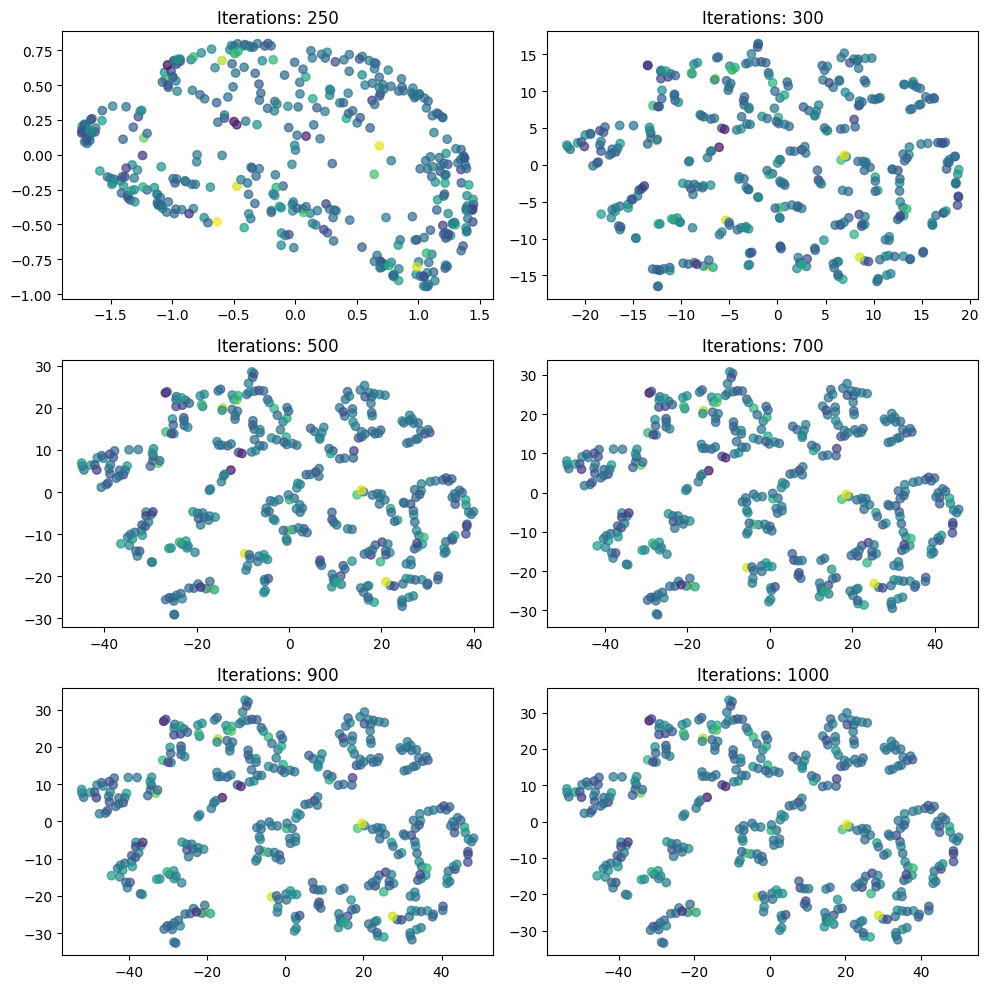

In [33]:
iterations = [250, 300, 500, 700, 900, 1000]

fig,axes = plt.subplots(3, 2, figsize=(10,10))

for i, iteration in enumerate(iterations):
  row = i // 2
  col = i % 2
  t_sne = TSNE(
      n_components=2,
      learning_rate="auto",
      perplexity=10,
      max_iter=iteration,
      init="random",
      random_state=0
  )
  t_sne250 = t_sne.fit_transform(df)
  ax = axes[row, col]
  ax.scatter(t_sne250[:,1], t_sne250[:,0], c=rcat_color2, alpha = 0.7, norm=matplotlib.colors.LogNorm())
  ax.set_title("Iterations: " + str(iteration))

plt.tight_layout()
plt.show()

# Target 3: reff(Tg=637)

In [34]:
rcat_color3 = df0["reff(Tg=673K)"]

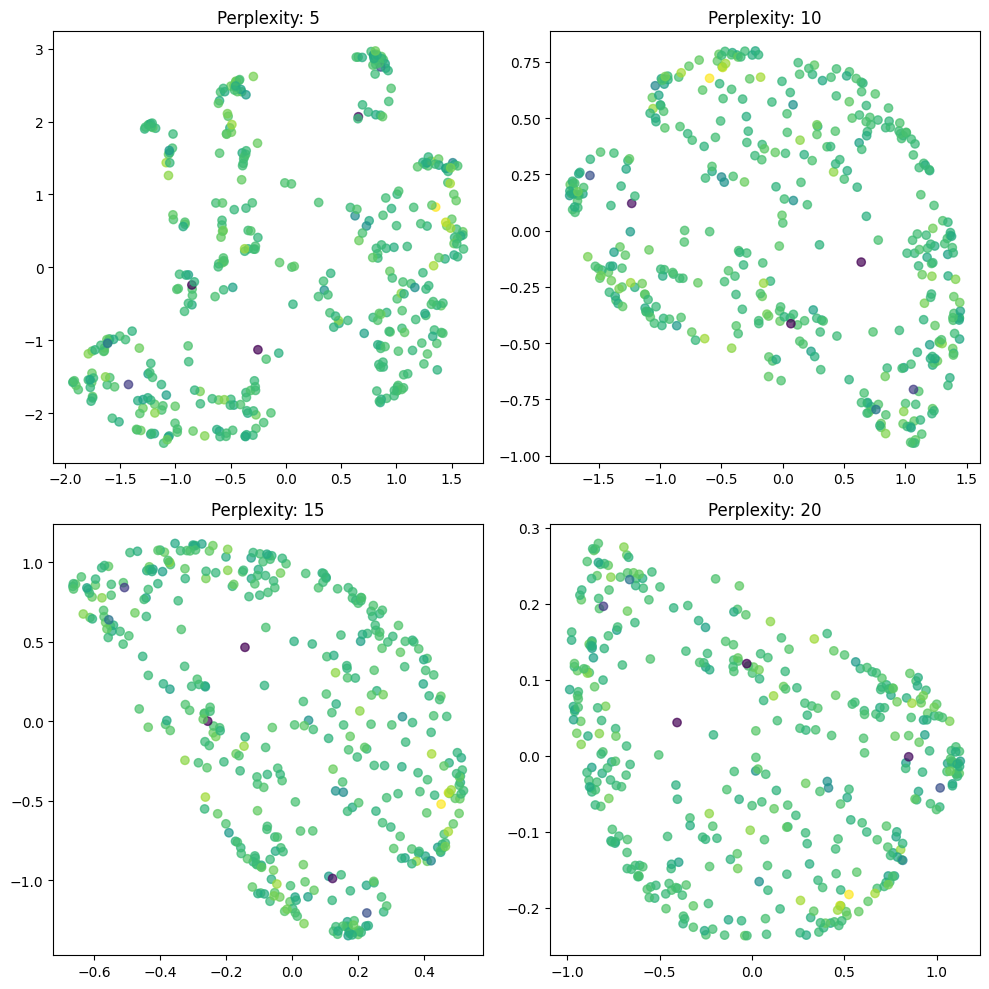

In [35]:
perplexities = [5, 10, 15, 20]

fig,axes = plt.subplots(2, 2, figsize=(10,10))

for i, perplexity in enumerate(perplexities):
  row = i // 2
  col = i % 2
  t_sne = TSNE(
      n_components=2,
      learning_rate="auto",
      perplexity=perplexity,
      max_iter=250,
      init="random",
      random_state=0
  )
  t_sne250 = t_sne.fit_transform(df)
  ax = axes[row, col]
  ax.scatter(t_sne250[:,1], t_sne250[:,0], c=rcat_color3, alpha = 0.7, norm=matplotlib.colors.LogNorm())
  ax.set_title("Perplexity: " + str(perplexity))

plt.tight_layout()
plt.show()

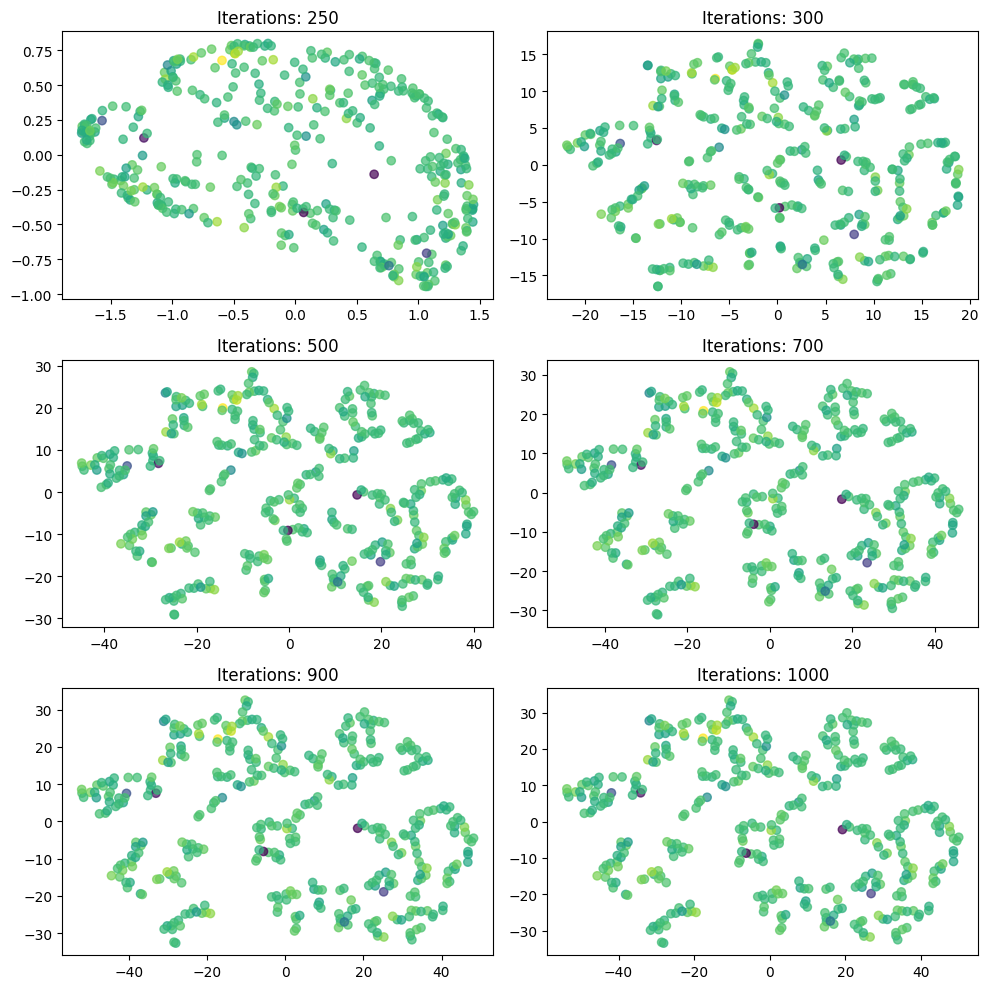

In [36]:
iterations = [250, 300, 500, 700, 900, 1000]

fig,axes = plt.subplots(3, 2, figsize=(10,10))

for i, iteration in enumerate(iterations):
  row = i // 2
  col = i % 2
  t_sne = TSNE(
      n_components=2,
      learning_rate="auto",
      perplexity=10,
      max_iter=iteration,
      init="random",
      random_state=0
  )
  t_sne250 = t_sne.fit_transform(df)
  ax = axes[row, col]
  ax.scatter(t_sne250[:,1], t_sne250[:,0], c=rcat_color3, alpha = 0.7, norm=matplotlib.colors.LogNorm())
  ax.set_title("Iterations: " + str(iteration))

plt.tight_layout()
plt.show()

# UMAP

In [37]:
!pip install umap-learn

In [38]:
import umap




In [39]:
!pip install datashader

In [40]:
import pandas
import matplotlib
import datashader
import bokeh
import holoviews

In [41]:
import umap.plot




In [42]:
mapper = umap.UMAP(n_neighbors=5,
                      min_dist=0.3,
                      metric='correlation').fit_transform(df)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipython-input-3380988162.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1, 1.05), loc=2)


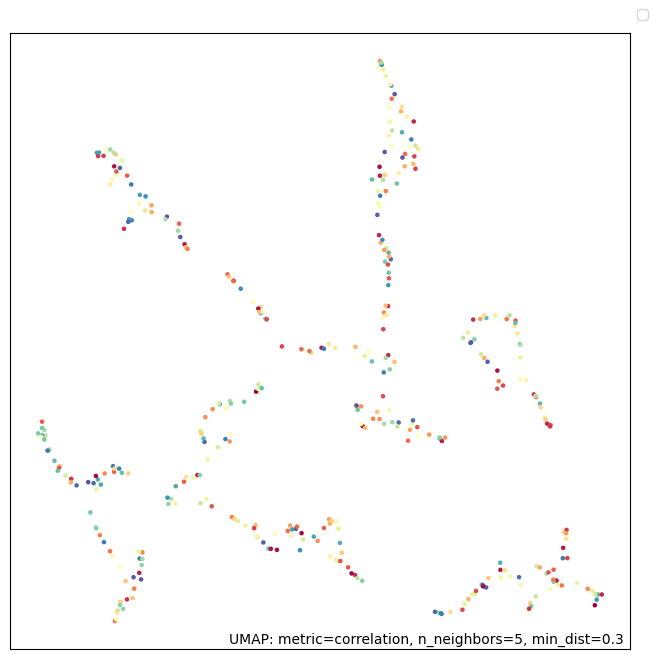

In [43]:

reducer = umap.UMAP(
    n_neighbors=5,
    min_dist=0.3,
    metric='correlation',
    random_state=0
)
reducer.fit(df)


umap.plot.points(reducer, labels=df0["rcat"])
plt.legend(bbox_to_anchor=(1, 1.05), loc=2)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipython-input-37323026.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1, 1.05), loc=2)
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/tmp/ipython-input-37323026.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1, 1.05), loc=2)
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


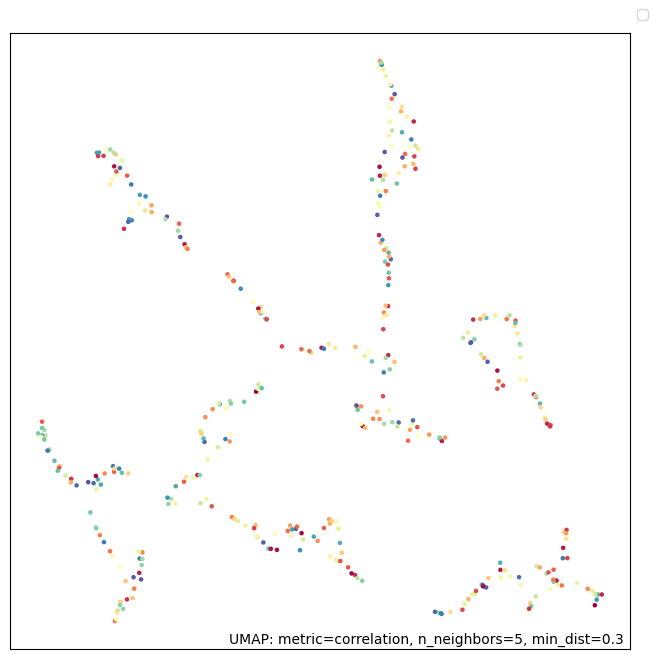

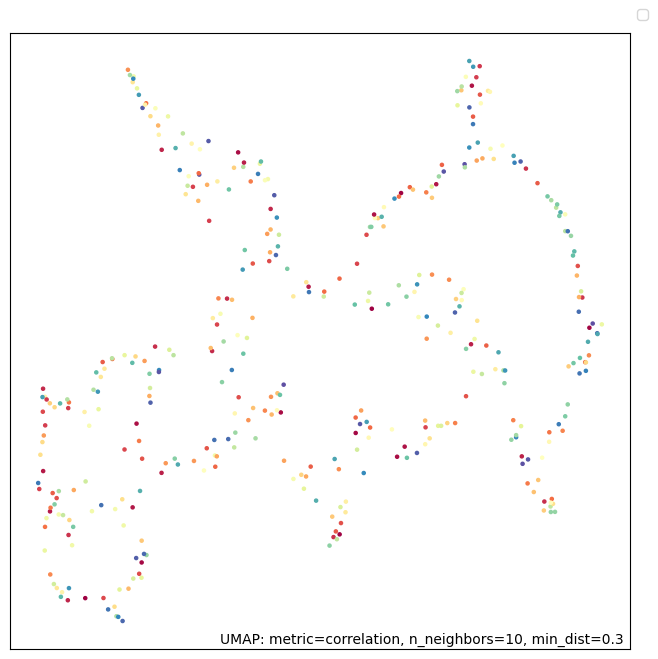

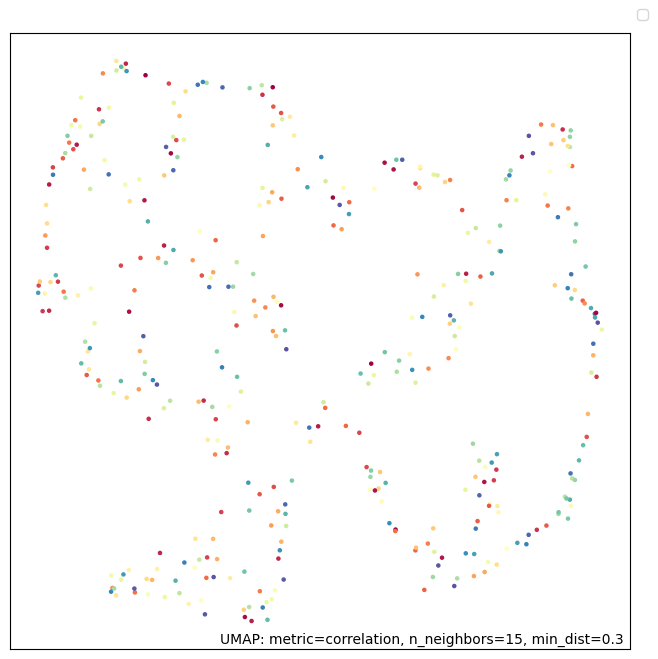

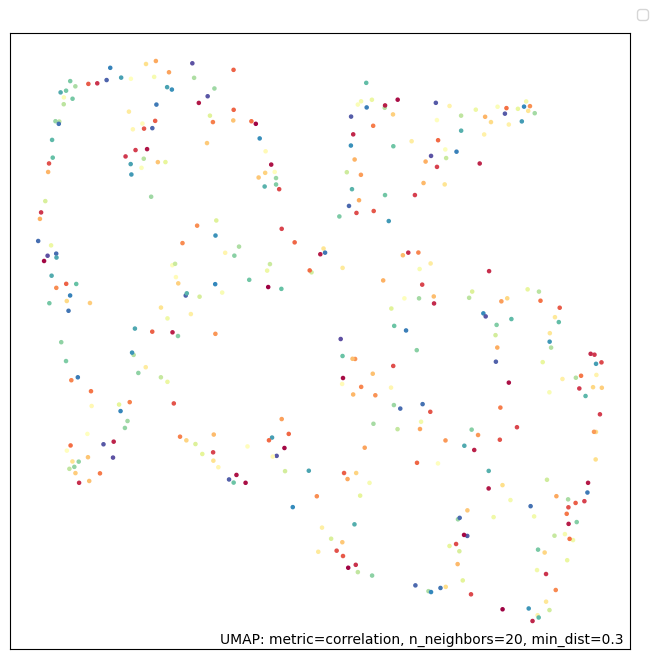

In [44]:
neighbors = [5, 10, 15, 20]

for neighbor in neighbors:
  reducer = umap.UMAP(
      n_neighbors=neighbor,
      min_dist=0.3,
      metric='correlation',
      random_state=0
  )
  reducer.fit(df)
  umap.plot.points(reducer, labels=df0["rcat"])
  plt.legend(bbox_to_anchor=(1, 1.05), loc=2)

/tmp/ipython-input-2308348845.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-2308348845.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-2308348845.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-2308348845.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()
/tmp/ipython-input-2308348845.py:12: UserWarning: No artists with labels found to put in legend.  Note that arti

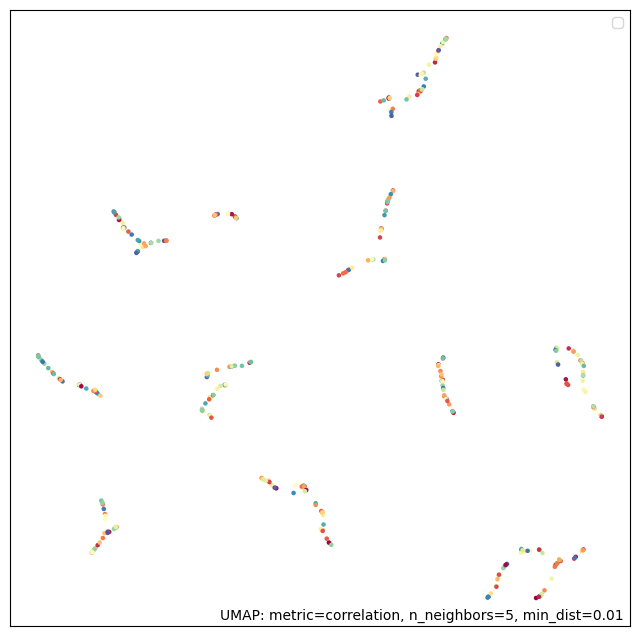

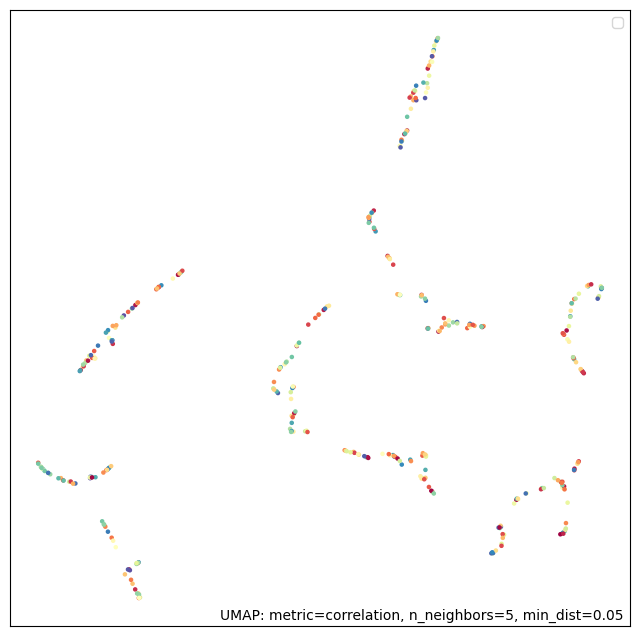

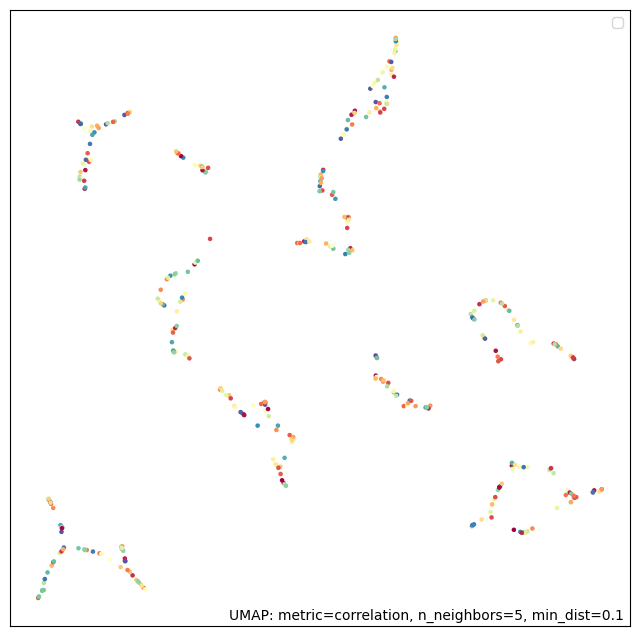

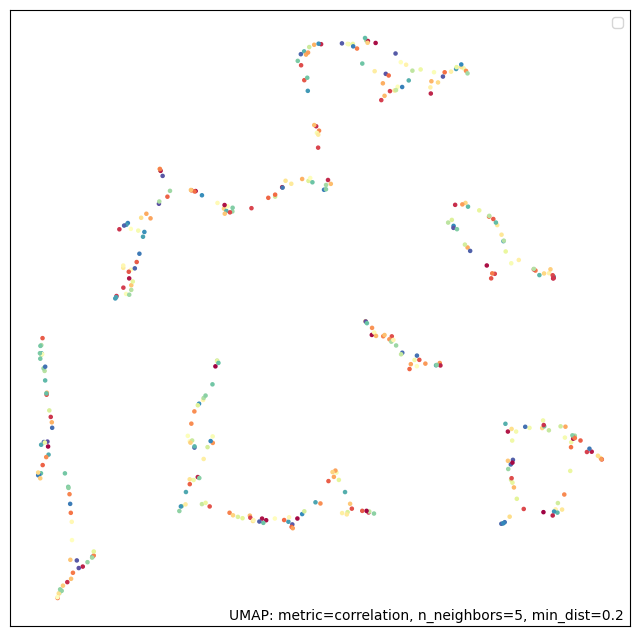

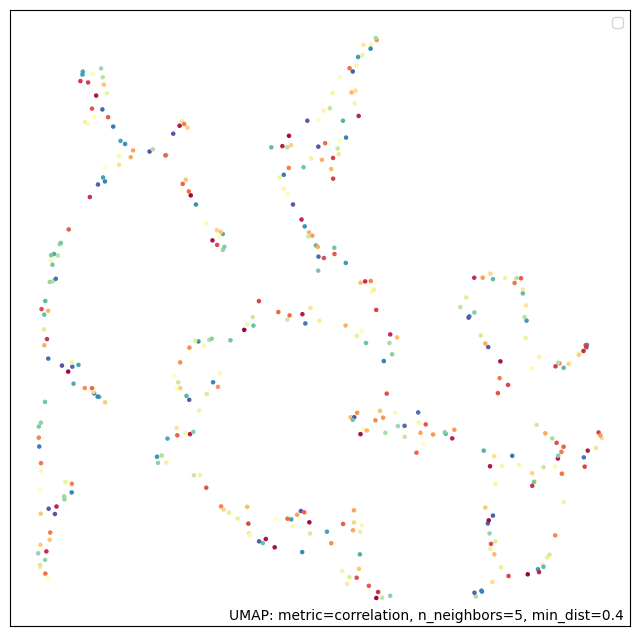

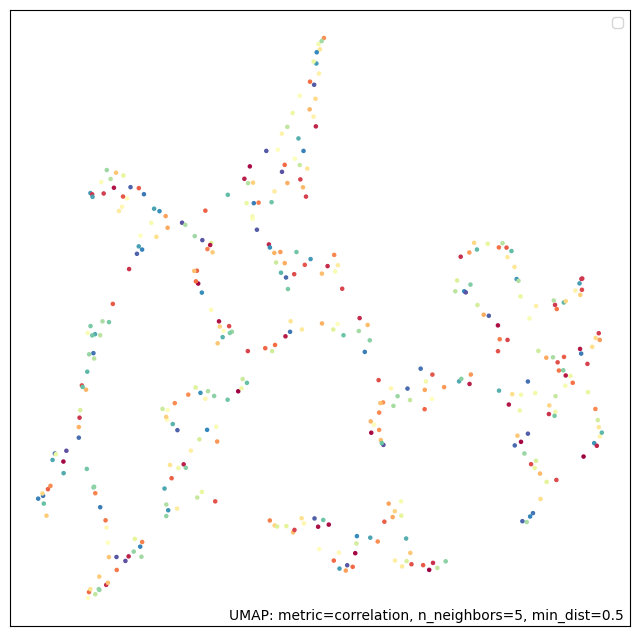

In [45]:
distributions = [0.01, 0.05, 0.1, 0.2, 0.4, 0.5]

for dist in distributions:
  reducer = umap.UMAP(
      n_neighbors=5,
      min_dist=dist,
      metric='correlation',
      n_jobs=1
  )
  reducer.fit(df)
  umap.plot.points(reducer, labels=df0["rcat"])
  plt.legend()

/tmp/ipython-input-1393062853.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1, 1.05))
/tmp/ipython-input-1393062853.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1, 1.05))
/tmp/ipython-input-1393062853.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1, 1.05))
/tmp/ipython-input-1393062853.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1, 1.05))
/tmp/ipython-inp

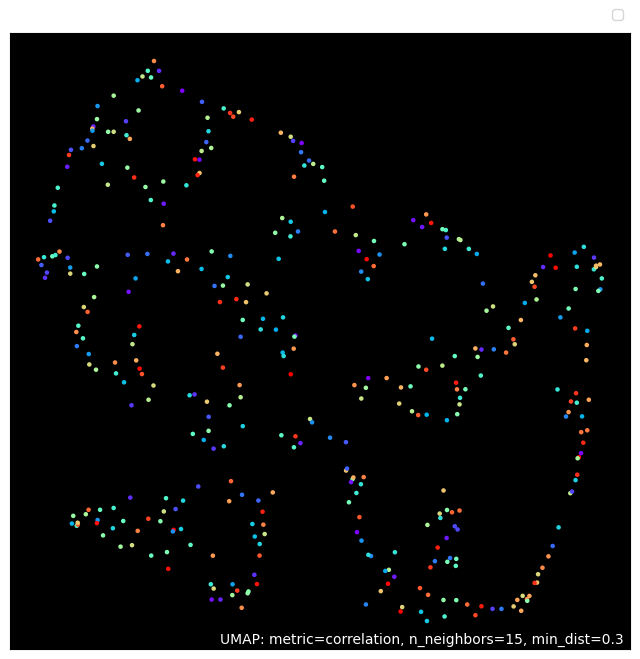

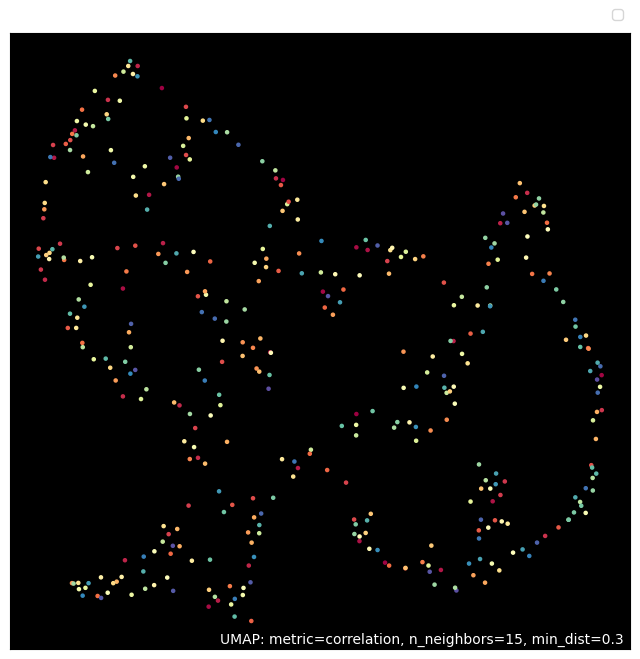

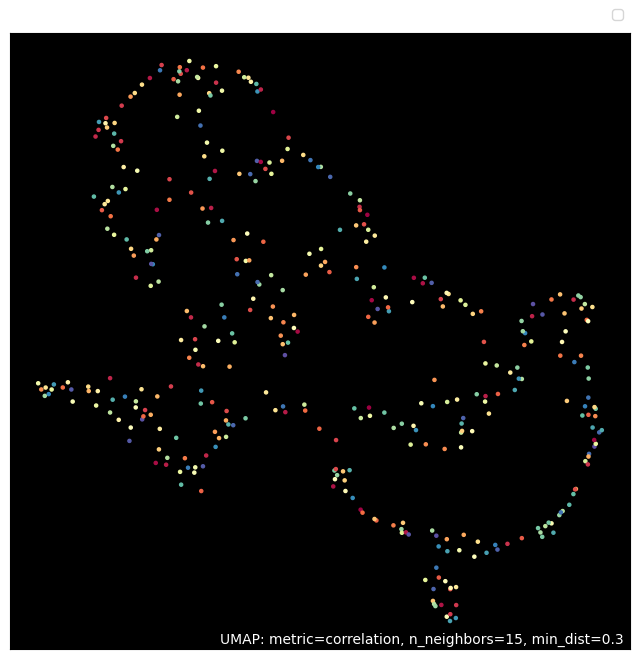

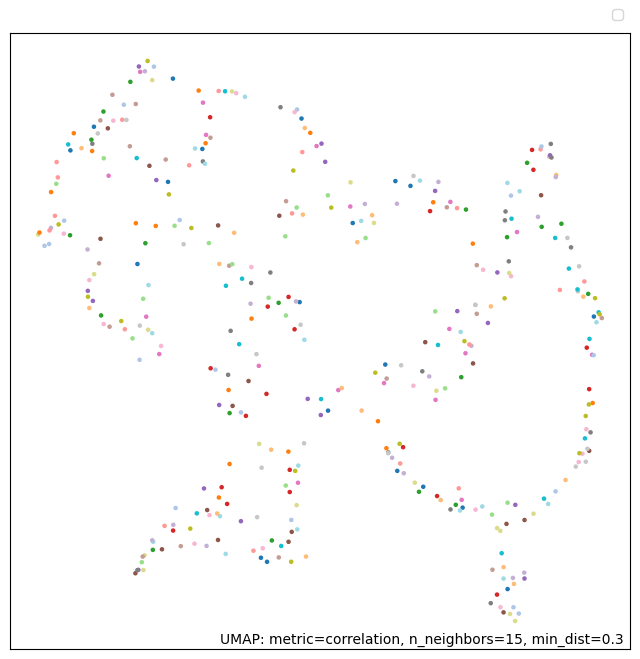

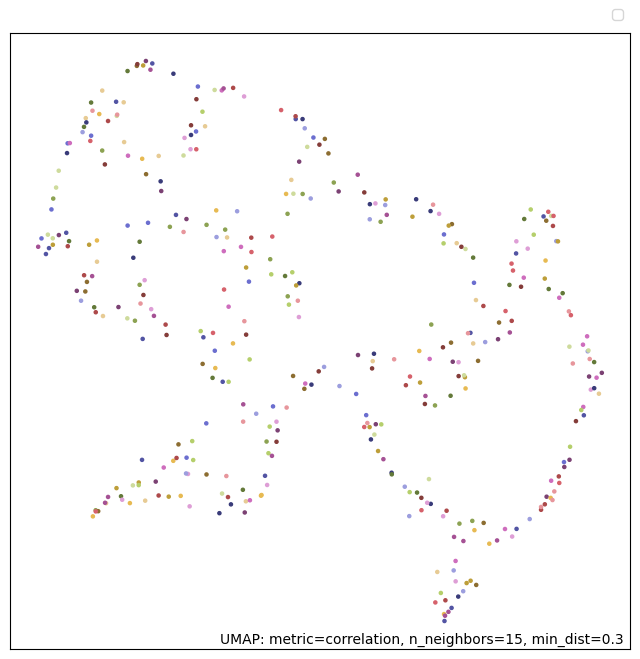

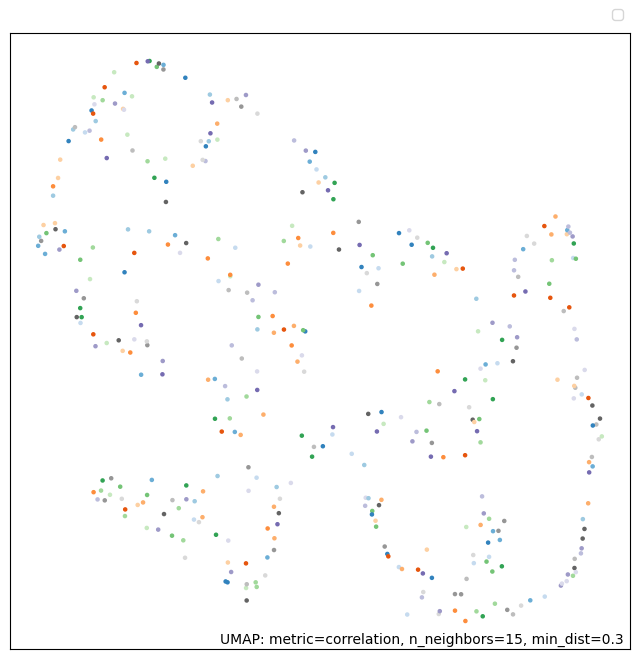

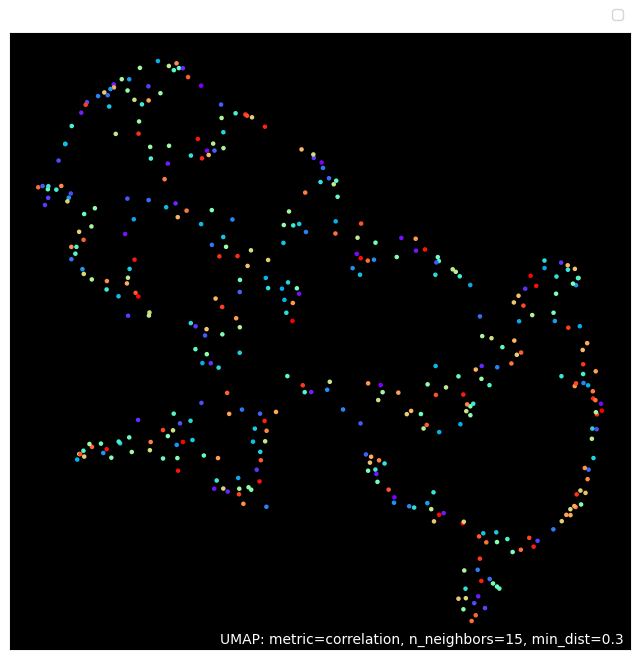

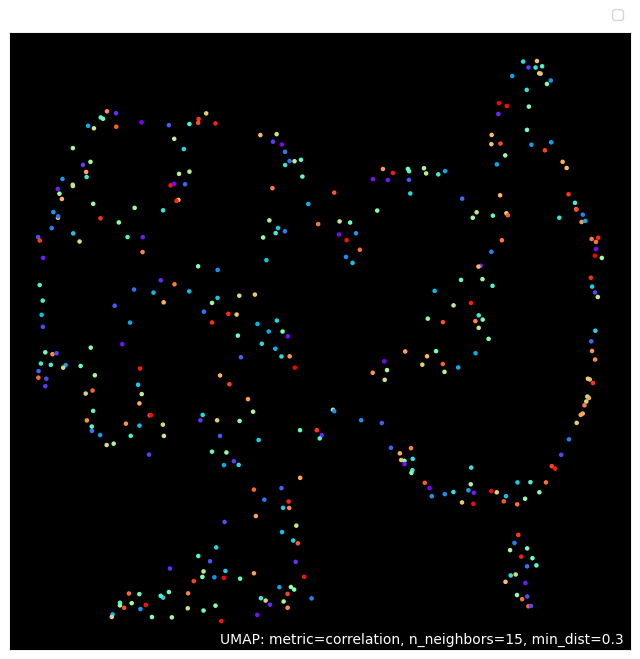

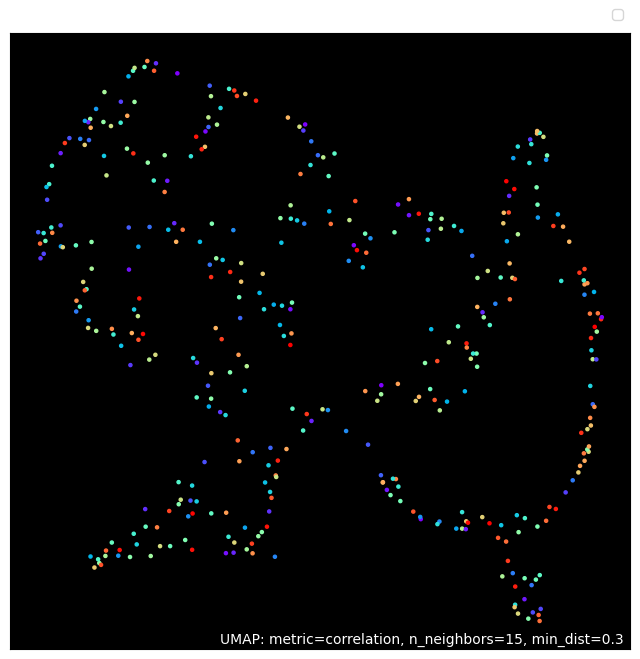

In [46]:
themes = ["fire", "viridis", "inferno", "blue", "red", "green", "darkblue", "darkred", "darkgreen"]

for theme in themes:
  reducer = umap.UMAP(
      n_neighbors=15,
      min_dist=0.3,
      metric='correlation',
      n_jobs=1
  )
  reducer.fit(df)
  umap.plot.points(reducer, labels=df0["rcat"], theme=theme)
  plt.legend(bbox_to_anchor=(1, 1.05))